In [11]:
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
#print(os.listdir('data/raw/squares'))

**Architecture Elements**

In [12]:
to_categorical = tf.keras.utils.to_categorical
Sequential = tf.keras.Sequential
Dense = tf.keras.layers.Dense
Conv2D = tf.keras.layers.Conv2D
Flatten = tf.keras.layers.Flatten
MaxPooling2D = tf.keras.layers.MaxPooling2D

square_size = 169


**Prepare Data for Training**

In [15]:
sq_label_fname = 'data/model/sq_labels.csv'
sq_data_path = 'data/raw/squares'
sq_labels = pd.read_csv(sq_label_fname, skiprows=1)
print(sq_labels.columns)

X_train_list = []
for _ in sq_labels['fname']:
    tmp_image = plt.imread(sq_data_path+'/'+_)
    X_train_list.append(tmp_image)   
print(set([_.shape for _ in X_train_list])) 

X_train = np.stack(X_train_list)
X_train = X_train[:,:,:,0:3].reshape(64,169,169,3)
print(X_train.shape)

sq_label_type_dict= {'E':0, 'P': 1, 'R':2, 'N':3, 'B':4, 'Q':5, 'K':6} 
sq_label_type_rev_dict = {v:k for k,v in sq_label_type_dict.items()}

print(sq_label_type_dict, sq_label_type_rev_dict)
y_train_list = sq_labels['type'].map(sq_label_type_dict).astype(int)

y_train = to_categorical(y_train_list)

Index(['fname', ' color', ' type', ' checked'], dtype='object')


FileNotFoundError: [Errno 2] No such file or directory: 'data/raw/squares/1.png'

In [4]:
model = Sequential()
model.add(Conv2D(filters=16,kernel_size=(15,15),padding='same',activation='relu',input_shape=(square_size,square_size,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
print(model.output_shape)
model.add(Dense(128, activation='relu'))
model.add(Dense(7, activation='softmax'))

(None, 28224)


In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
if 'cnn_pieces.h5' in os.listdir():
    model = tf.keras.models.load_model('cnn_test.h5')
else:
    model.fit(X_train, y_train, epochs=25, verbose=2, validation_data = (X_train, y_train))
    model.save('data/model/Identify-Piece/cnn_pieces.h5')

Epoch 1/25
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2021-11-09 16:41:11.726964: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-11-09 16:41:11.728775: W tensorflow/core/platform/profile_utils/cpu_utils.cc:126] Failed to get CPU frequency: 0 Hz


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
2/2 - 1s - loss: 7.0233 - accuracy: 0.5156 - val_loss: 3.8891 - val_accuracy: 0.2500
Epoch 2/25
2/2 - 1s - loss: 2.8768 - accuracy: 0.2500 - val_loss: 1.8496 - val_accuracy: 0.2500
Epoch 3/25
2/2 - 1s - loss: 1.5827 - accuracy: 0.4375 - val_loss: 1.7225 - val_accuracy: 0.5000
Epoch 4/25
2/2 - 1s - loss: 1.5597 - accuracy: 0.5625 - val_loss: 1.2639 - val_accuracy: 

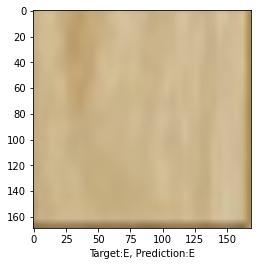

In [10]:
def show_prediction(X_test, y_test, model, reverse_dict=None):
    '''Displays the image (X_test is of form (1,h,w,c), its associated target and the predicted value. A "reverse_dict" is applied on the target and prediction if not None.'''
    
    #Predict 
    pred = model.predict(X_test)[0]
    

    #Find Target and Prediction indices
    pred_idx = int(np.where(pred==max(pred))[0])
    target_idx = int(np.where(y_test==1)[0])
    
    
    #Replace indices with str if there is a dict
    if reverse_dict:
        pred_str, target_str = reverse_dict[pred_idx], reverse_dict[target_idx]
    else: 
        pred_str, target_str = str(pred_idx), str(target_idx)
    
    
    #Plot and Insert Target&Prediction
    ax = plt.imshow(np.squeeze(X_test,axis=0)) 
    ax.axes.set_xlabel("Target:{0}, Prediction:{1}".format(target_str, pred_str))
    plt.show()
    
    

rand = np.random.randint(0,y_train.shape[0])
X_inp = np.expand_dims(X_train[rand,:,:,0:3],0)
y_inp = y_train[rand,:]

show_prediction(X_inp, y_inp, model, reverse_dict = sq_label_type_rev_dict)